# Investigating Titanic Dataset 

## Analysis Questions:

Q1 - What The variation of ages in Titanic dataset ?

Q2 - What The variation of gender in Titanic dataset ?

Q3:  Which Age range has more survival chance?  

Q4 - Has the gender influenced the survival chance?

Q6- has the travel class influenced the survival chance ?

Q7- Depend on the gener which has more survival rate ,does it apply classes  ?


In [572]:
#import pandas
import sys
print(sys.version)#python version 
print(sys.version_info)
import pandas as pd
import numpy as np
print("pandas " + str(pd.__version__))
print("numpy " + np.__version__)

2.7.13 |Anaconda custom (x86_64)| (default, Dec 20 2016, 23:05:08) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
sys.version_info(major=2, minor=7, micro=13, releaselevel='final', serial=0)
pandas 0.19.2
numpy 1.11.3


In [573]:
#Load the dataset 
titanic_data  = pd.read_csv("/Users/hana/Desktop/datascience/data_analysis/titanic-data.csv")

## Data Wrangling
First I'm going to remove the columns that's not related to the analysis questions. it's good approcahe to not load the entire Dataset when analaysis it.  


In [574]:
#Drop the spesified columes 
titanic_data =titanic_data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],1)
titanic_data.head(5)

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0



-------------------------------

 In order to start the data Wrangling, we need to check the info of the data like checking the length of data ,and if there's null values

In [575]:
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.9+ KB
None


We can see from the above result only Age have some null values.In This case we have many options to handle the missing values.I'm going to choose to full the null values with the average/mean of ages.This choice is not always the best option but as the missing records are not a huge number it would be a good option.

In [576]:
titanic_data.describe()

,Survived,Pclass,Age
count,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.699118
std,0.486592,0.836071,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,20.125000
50%,0.000000,3.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


The above table summarize the statstics values of ages  
Mean :29.699118
std:14.526497
min:0.420000
max:80.000000


In [577]:
#average of ages 
averageage=titanic_data.Age.mean()
print(averageage)

29.6991176471


After calculating the mean of the ages , I'm going to full the missing values with the mean as showen below:

In [578]:
titanic_data.Age = titanic_data.Age.fillna(averageage)

The below step for double check if there is no null (should be all fales )

In [579]:
#check if there's a null values in the data, specially the columes i'm ganna use in my analysis
print (titanic_data.isnull()) 

    Survived Pclass    Sex    Age
0      False  False  False  False
1      False  False  False  False
2      False  False  False  False
3      False  False  False  False
4      False  False  False  False
5      False  False  False  False
6      False  False  False  False
7      False  False  False  False
8      False  False  False  False
9      False  False  False  False
10     False  False  False  False
11     False  False  False  False
12     False  False  False  False
13     False  False  False  False
14     False  False  False  False
15     False  False  False  False
16     False  False  False  False
17     False  False  False  False
18     False  False  False  False
19     False  False  False  False
20     False  False  False  False
21     False  False  False  False
22     False  False  False  False
23     False  False  False  False
24     False  False  False  False
25     False  False  False  False
26     False  False  False  False
27     False  False  False  False
28     False  

I have change both the type of the age and the type of gender to be intger.'Age' to remove the floats point and gender for easier refernece.

In [580]:
#change the type of age from float to int
titanic_data['Age'] = titanic_data.Age.astype(int)
print (titanic_data.Age.dtype)


int64


In [581]:
#change from string to int and insert new columen Gender to store the value 
titanic_data['Gender'] = titanic_data['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
print (titanic_data.Gender.dtype)

int64


Checking the Distinct values of Sex entered in the dataset so we can make sure there's no F and Female for example. 

In [582]:
#check distinct value of the sex
np.unique(titanic_data['Sex'])


array(['female', 'male'], dtype=object)

It's clear that there's two distinct values in sex record, so theres no typos or F or M indicating females and males. 

In [583]:
#this function is for categorize the ages into two categories Adult and Child
def convert_age(age):
    if age >=18:
        return "adult"
    else:
        return "child"

In [584]:
# Apply the function and add the results as a new column called `type`

titanic_data['type'] = titanic_data['Age'].apply(convert_age)

in the above code I've added a function to add new colum for type of age.


 '>=18' is a adult
 '<18' is child 

## Data Analysis:  


In the Analysis Phase , I'm going to answers the stated questions (Analysis Questions)
using group by and charts we got the following information about the Data Set : 

1- the count of survived passengers in titanic :342
2- the count of not survived passengers in titanic :549
3- the count of adult surivived passengers 281
4- the count of adult not surivived passengers 497
5- the count of child survived passengers 61
6- the count of child not survived passengers 52

## Overall Survivals

In [585]:
(titanic_data['Survived'] == 1).sum()

342

In [586]:
(titanic_data['Survived'] == 0).sum()

549

The number of survived passengers is less than the died passengers in taitanic dataset: 342<549 

## Survivals Age Wise (adult and child)

In the below, we did some filtration to count the number of survival for adult and child. 

In [587]:
titanic_data.loc[(titanic_data.type=="adult") & (titanic_data.Survived==1),'Survived'].count()

281

In [588]:
titanic_data.loc[(titanic_data.type=="adult") & (titanic_data.Survived==0),'Survived'].count()

497

In [589]:
titanic_data.loc[(titanic_data.type=="child") & (titanic_data.Survived==1),'Survived'].count()

61

In [590]:
titanic_data.loc[(titanic_data.type=="child") & (titanic_data.Survived==0),'Survived'].count()

52

In [591]:
titanic_data.groupby(titanic_data['type'])['Survived'].sum()

type
adult    281
child     61
Name: Survived, dtype: int64

As showen above the number of survival adult is 281 where child is 62 . this can indicate that the adult chance of survival was more compared to child in general.

----------------------------------------------------------------------------

## Survivals Gender Wise 


In [592]:
titanic_data.loc[(titanic_data.Gender==0) & (titanic_data.Survived==1),'Survived'].count()

233

In [593]:
titanic_data.loc[(titanic_data.Gender==1) & (titanic_data.Survived==1),'Survived'].count()

109

In [594]:
titanic_data.groupby(titanic_data['Gender'])['Survived'].sum()

Gender
0    233
1    109
Name: Survived, dtype: int64

As showen above the number of survived Females is greater compared to the number of survived males
count of survived femalea > count of survived males

In [595]:
titanic_data.groupby(titanic_data['Pclass'])['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

The passengers travelling in Class no# 1 were more likely to survive than passengers in classs no# 2&3

## Plots / Charts 


In [596]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


## Age 

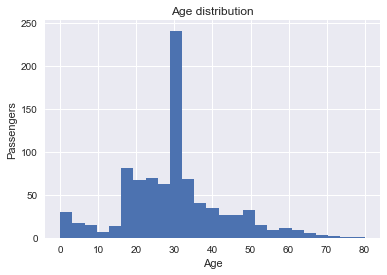

In [597]:
#create new figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(titanic_data['Age'],bins = 25)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Passengers')
plt.show()



The ages as showen in the above histogram is normaly disturbution   
we see tha ages from 20 to 35 seemed to be the greater number of the passengers.

## Geneder 

577
314


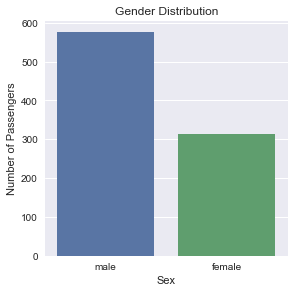

In [598]:
#Number of males and females in Titanic 
g = sns.factorplot('Sex', data=titanic_data, kind='count')
g.despine(left=True)
g.set_ylabels("Number of Passengers")
g.set(title='Gender Distribution')

print (titanic_data[titanic_data.Sex == 'male'].count()['Sex'])
print (titanic_data[titanic_data.Sex == 'female'].count()['Sex'])


Overall Males in the tatinic is greater than females.

## **Survival by Gender**

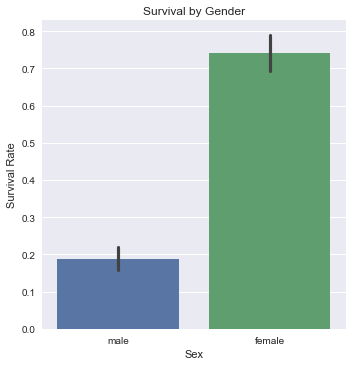

In [599]:
#survival of male and female

g = sns.factorplot("Sex", "Survived", data=titanic_data, kind="bar", size=5)
g.despine(left=True)
g.set_ylabels("Survival Rate")
g.set(title='Survival by Gender')

About .70 (70%) of female passengers survived while male passengers about 0.2(20%) survived.


**It's clear that the Gender influential to survival.females are priority to life compared to males.**


## **Survival by Age**

To see weather child or adult survived in titanic. 

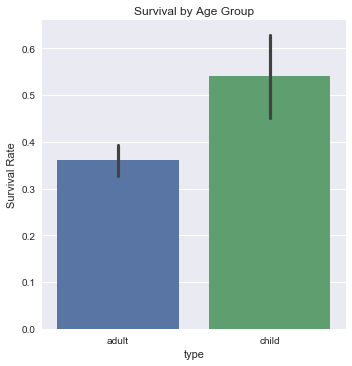

In [600]:
g = sns.factorplot("type", "Survived", data=titanic_data, kind="bar", size=5)
g.despine(left=True)
g.set_ylabels("Survival Rate")
g.set(title='Survival by Age Group')

About (60%) of child passengers survived while adult passengers about (40%) survived.


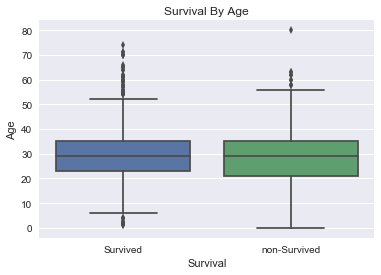

In [601]:
g = sns.boxplot(data=titanic_data, x='Survived', y='Age')
g.set(title='Survival By Age',
 xlabel = 'Survival',
 ylabel = 'Age',
 xticklabels = ['Survived', 'non-Survived'])

Since we categorize the Age to be adult and child , the above plot shows the survivalsage wise.
in the above we can see the older ages in the non-survived group.

**We can say that the age effect the chance of survival , It could be a priority for them to save the childern first.Also most of the old age died due to their disabilities **

## **Survival by Class**

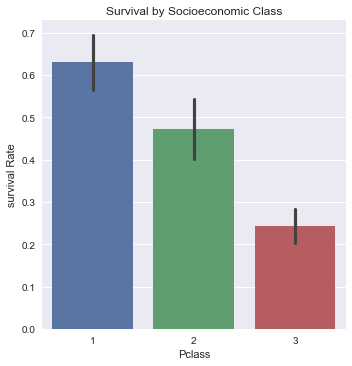

In [602]:
g = sns.factorplot("Pclass", "Survived",order=[1,2,3],data=titanic_data,kind="bar", size=5)
g.despine(left=True)
g.set_ylabels("survival Rate")
g.set(title='Survival by Socioeconomic Class')

In the above plot we can see about 70% of survival passenger in class #1.

**It's clear that the passengers that class 1 males had a higher survival chance.It could be the case that the exite and the lifeboat are accessable more thant the other classes. **

## Survival by Class and Gender 

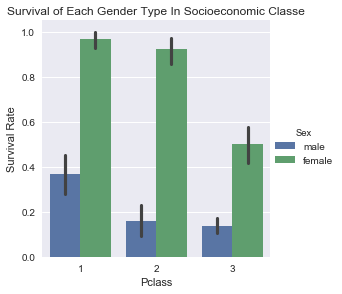

In [603]:
g = sns.factorplot("Pclass", "Survived",order=[1,2,3],data=titanic_data,hue='Sex', kind='bar')
g.despine(left=True)
g.set_ylabels("Survival Rate")
g.set(title='Survival of Each Gender Type In Socioeconomic Classe')

As showen above the Female passengers in Class 1 and 2 passengers have survived more.
**Females passengers with class 1 and 2 had a higher survival chance.We can conclude that female is a priority in echa class.** 

# summary 


All in all , We have conducted the analysis based on the Titanic data set.  
The most passengers ages range from 20 to 35 ,and the number of Males passengers in the tatinic is greater than females passengers.Adults chance of survival was more compared to child ,Moreover passengers older than 40 have less chence of survivial.Also, Female chance of survival was more compared to male.Passengers who booked First class were more likely to survive than the other classes.
Female chances of Survival was more compared to Male. The passengers travelling in Class-1 were more likely to survive than the passengers travelling in Class-2, which inturn were more likely to survive than Class-3 passengers. Children and Young passengers survival was more likely compared to middle-aged and Senior-citizens.comparing the class with the gender there was signifcant indication that female with class #1 has greater chance of survival.



# Limitations of Analysis:
The analysis based on the a dataset which we may ignored some factors that the dataset doesn't cover and influence the anslysis result.The dataset has some null values such as the age and treating it with the mean could affect the calculations and therfore the analysis result.We have used statistical calculations throughout the anaylysis but we have not tested the resulat using statistical testing. 